<a href="https://colab.research.google.com/github/Tulasipotu08/hackathon/blob/main/onlinefruaddetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [80]:
df=pd.read_csv('/content/onlinefraud.csv')

In [81]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [82]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2304042,188,PAYMENT,2557.93,C120048092,0.0,0.0,M832452744,0.0,0.0,0.0,0.0
2304043,188,PAYMENT,7872.85,C106535592,0.0,0.0,M374236217,0.0,0.0,0.0,0.0
2304044,188,PAYMENT,186.77,C798893573,0.0,0.0,M1870926086,0.0,0.0,0.0,0.0
2304045,188,PAYMENT,641.35,C633494148,0.0,0.0,M1086889385,0.0,0.0,0.0,0.0
2304046,188,CASH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304047 entries, 0 to 2304046
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 193.4+ MB


In [84]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [85]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.304047e+06,2.304046e+06,2.304046e+06,2.304046e+06,2.304046e+06,2.304046e+06,2.304046e+06,2304046.0
mean,9.790561e+01,1.610262e+05,8.535921e+05,8.751275e+05,9.991389e+05,1.114145e+06,9.261968e-04,0.0
std,6.740484e+01,2.687983e+05,2.926401e+06,2.962733e+06,2.307035e+06,2.396213e+06,3.041939e-02,0.0
min,1.000000e+00,6.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,2.600000e+01,1.316667e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,1.310000e+02,7.896108e+04,1.483250e+04,0.000000e+00,1.412915e+05,2.316468e+05,0.000000e+00,0.0
75%,1.600000e+02,2.163335e+05,1.185490e+05,1.606906e+05,9.521724e+05,1.150866e+06,0.000000e+00,0.0
max,1.880000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.228378e+07,4.265577e+07,1.000000e+00,0.0


In [86]:
df.isnull().sum()

step              0
type              0
amount            1
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [87]:
for col in df.columns:
    if df[col].dtype == 'object':
        continue
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

In [88]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 3
Integer variables: 1
Float variables: 7


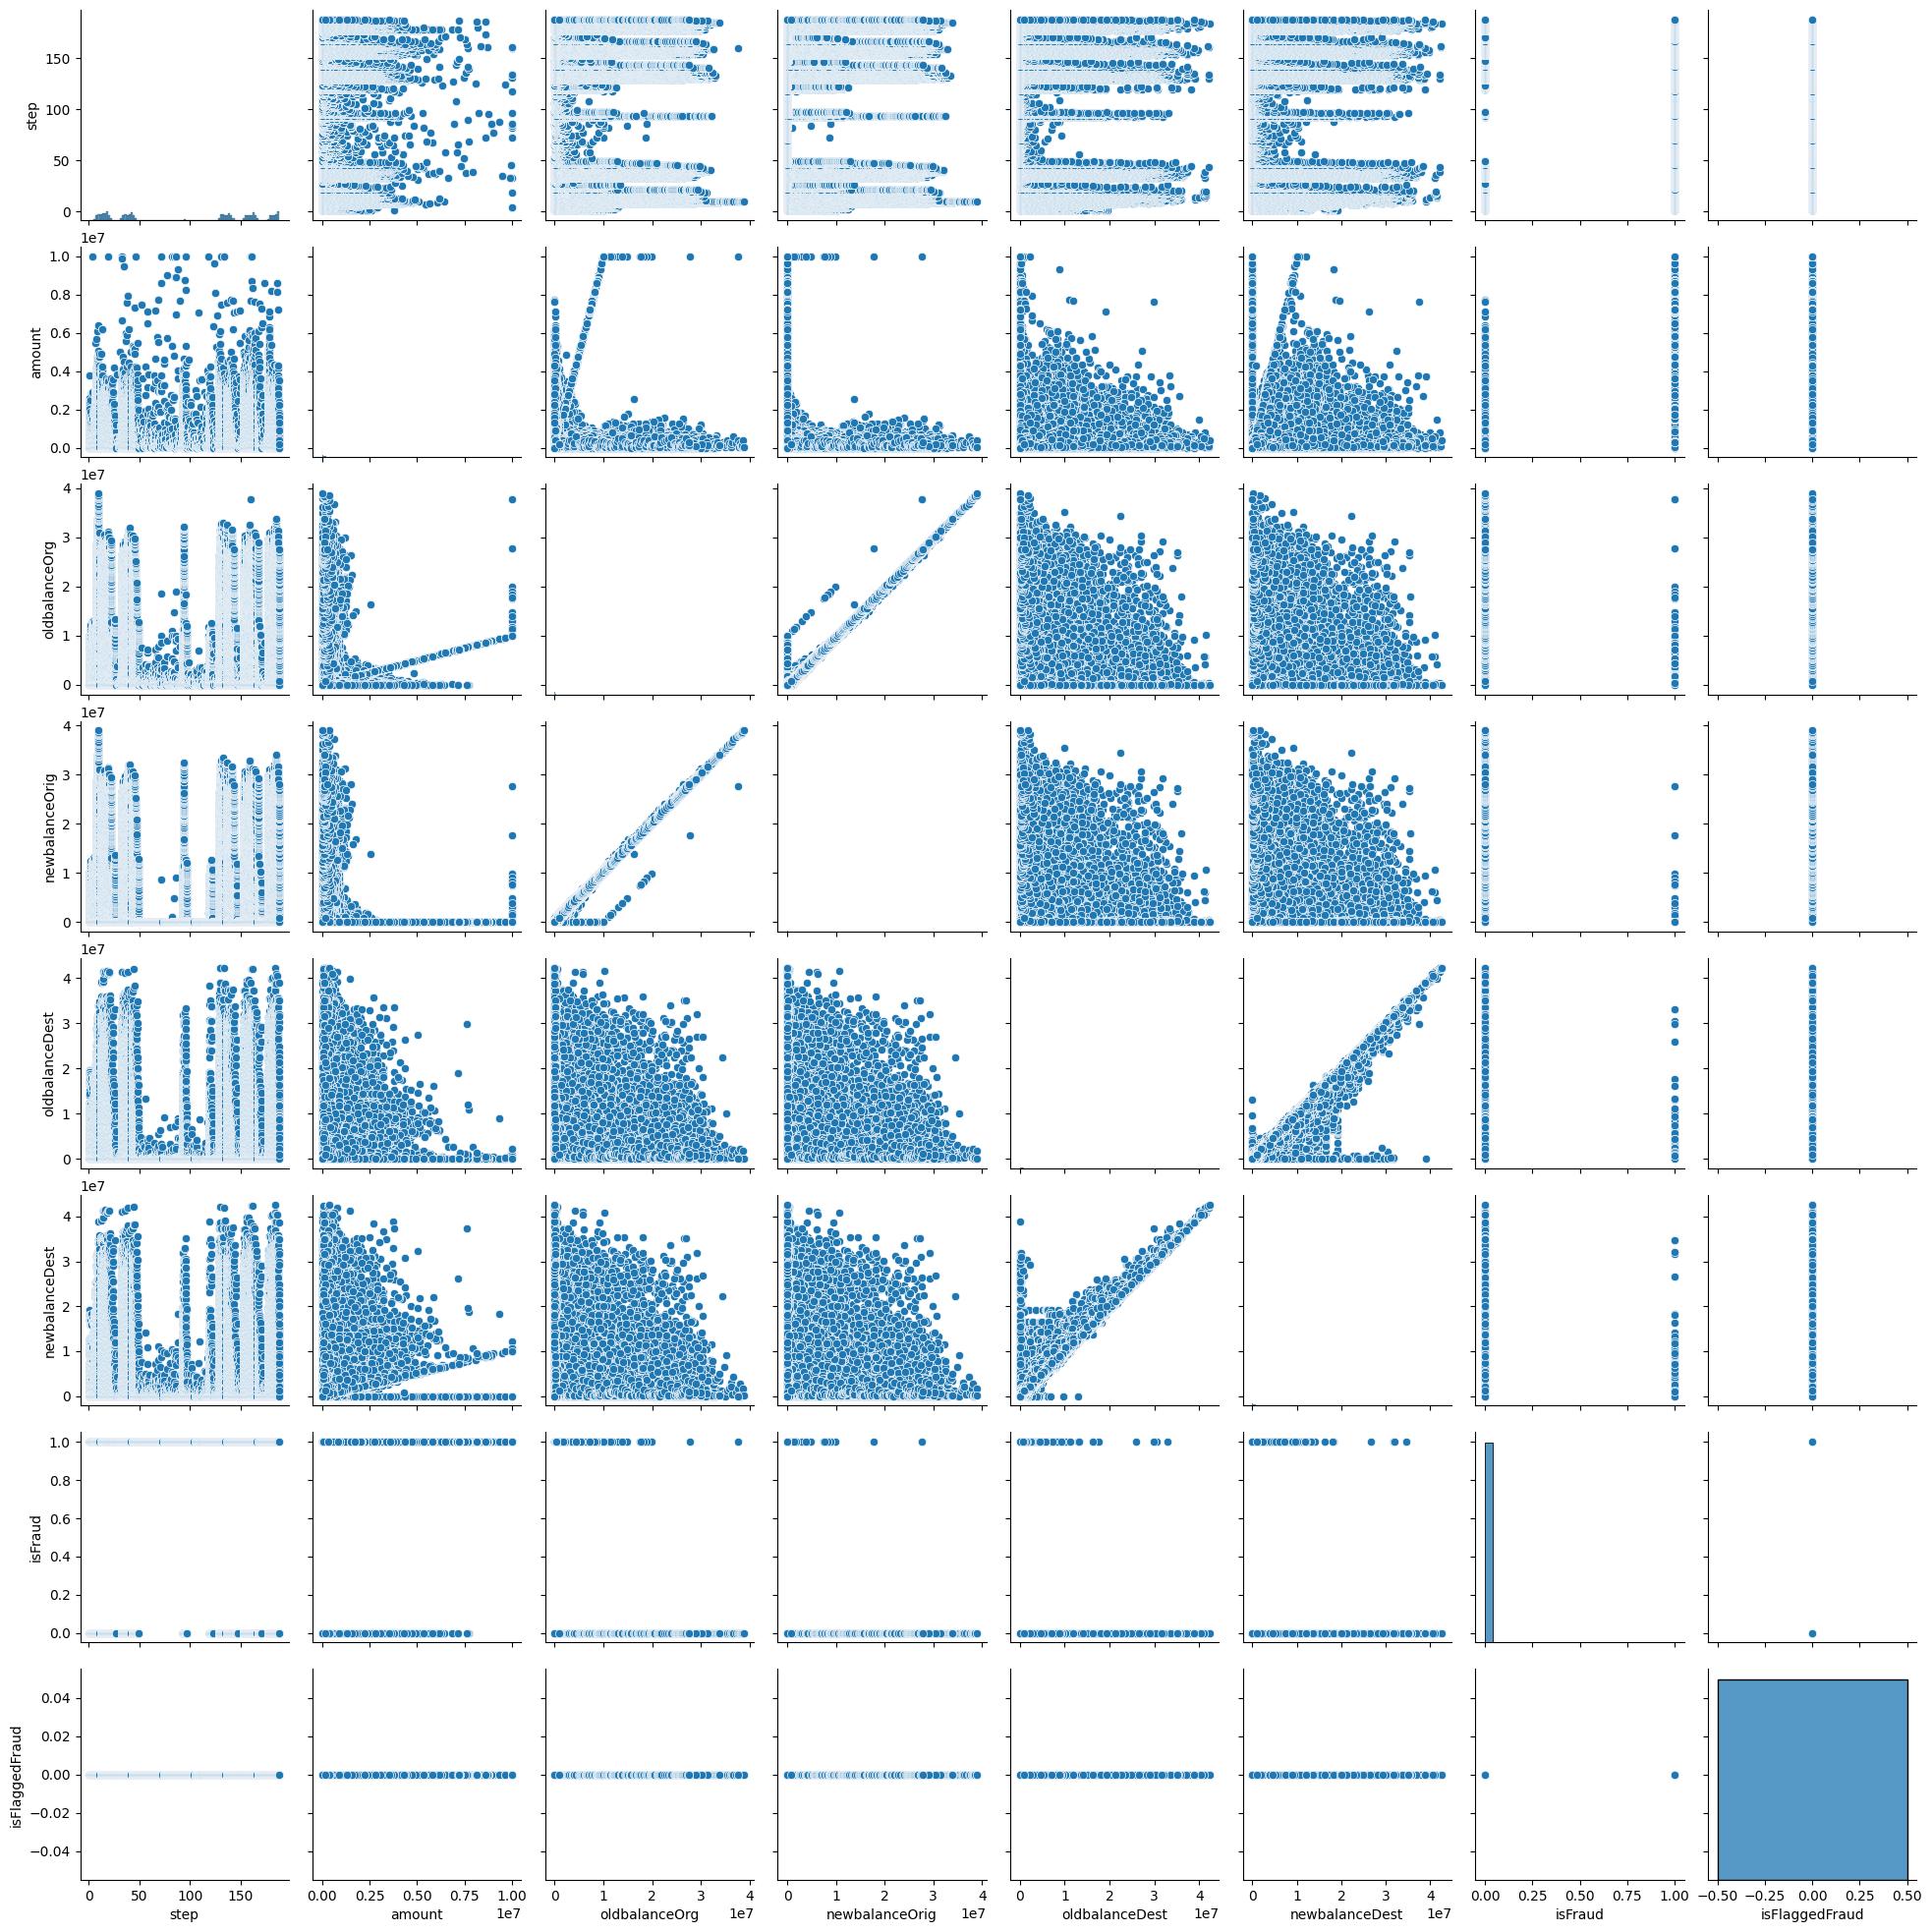

In [68]:
sns.pairplot(df)

<ipython-input-69-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

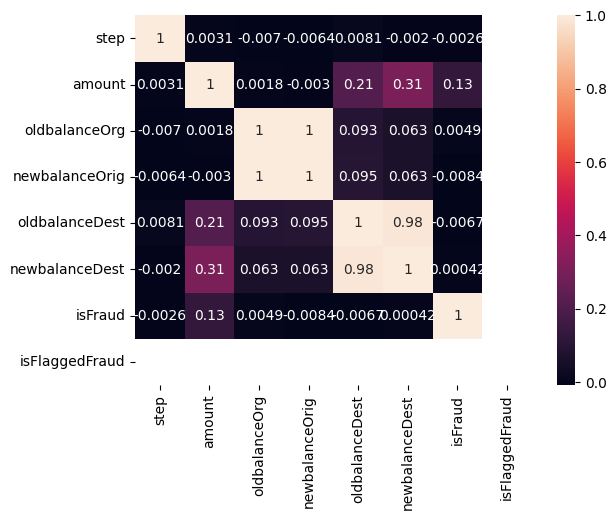

In [69]:
sns.heatmap(df.corr(),annot=True)

In [70]:
df['isFraud'].value_counts()

0.000000    2301912
1.000000       2134
0.000926          1
Name: isFraud, dtype: int64

In [71]:
type_new = pd.get_dummies(df['type'], drop_first=True)
data_new = pd.concat([df, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,0,0,0,1,0


In [72]:
df.dropna(subset=['isFraud'], inplace=True)


df.dropna(subset=['nameDest'], inplace=True)


In [73]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [74]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [77]:
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print("Mean Absolute Error:",mse)

Mean Absolute Error: 0.0008030203238435902


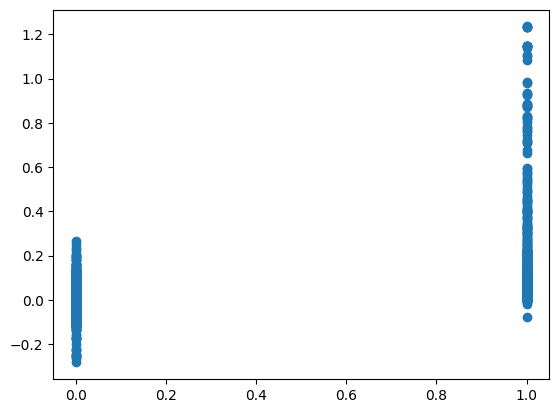

In [78]:
plt.scatter(y_test,y_pred)